In [1]:
import numpy as np # lib utilizada para trabalhar com vetores
import pandas as pd # lib para trabalhar com dataframes (planilhas excel)
import seaborn as sns #lib utilizada para criar graficos mais bonitos
import matplotlib.pyplot as plt #lib para criar graficos comuns ao estilo matlab
import seaborn as sn #biblioteca utilizada para os plots mais bonitos
from sklearn.model_selection import train_test_split #biblioteca para a divisão do dataset entre treinamento e teste

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# * Conhecendo o DataSet

In [2]:
#função utilizada apenas para realizar o upload dos dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving df_titanic.csv to df_titanic.csv


***DICIONÁRIO DE DADOS:***
* Survived (Sobreviveu): 0 = Não 1 = Sim
* Pclass (Classe): Tipo da passagem 1 = 1º Classe, 2 = 2º Classe 3 = 3º Classe
* Sex (Sexo): Sexo do passageiro
* Age (Idade): Idade
* Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
* Parch: Quantidade de pais / crianças a bordo do Titanic
* Ticket (Bilhete): Número do bilhete de embarque
* Fare (Tarifa): Valor da passagem
* Cabin (Cabine): Número da cabine
* Embarked (Embarque): Porto de Embarque (C = Cherbourg Q = Queenstown S = * * 
* Southampton)

In [3]:
#realiza a leitura do banco de dados
df_titanic=pd.read_csv("df_titanic.csv")
df_titanic.head()  #realiza visualização das 5 primeiras linhas do dataset

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df_titanic.info() #informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [5]:
df_titanic.shape #Tamanho do dataset

(1309, 28)

In [6]:
df_titanic.dtypes #Tipos de dados dos atributos

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
2urvived         int64
dtype: object

In [7]:
df_titanic[0:1] #Selecionando a primeira linha do dataset

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [8]:
df_titanic[0:10] #Selecionando as 10 primeiras linhas do dataset

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1


In [9]:
#Verificando por colunas com dados em brancos ou nulos
df_titanic.columns[df_titanic.isnull().any()].values

array(['Embarked'], dtype=object)

In [10]:
#Verificando se existe valores nulos no dataset
nans = df_titanic.isna().sum()
nans[nans > 0]

Embarked    2
dtype: int64

In [11]:
nans['Embarked'] #quantidade de registros nulos.

2

In [12]:
#Verificando se existe dados duplicados
sum(df_titanic.duplicated())

0

In [14]:
df_titanic.describe() #Verificando as estatisticas do dataset

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [15]:
df_titanic['Age'] #Selecionando colunas do dataset atributo idade.

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64

In [16]:
df_titanic['Embarked'],df_titanic['Sex'] #Seleção de duas colunas

(0       2.0
 1       0.0
 2       2.0
 3       2.0
 4       2.0
        ... 
 1304    2.0
 1305    0.0
 1306    2.0
 1307    2.0
 1308    0.0
 Name: Embarked, Length: 1309, dtype: float64, 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 1304    0
 1305    1
 1306    0
 1307    0
 1308    0
 Name: Sex, Length: 1309, dtype: int64)

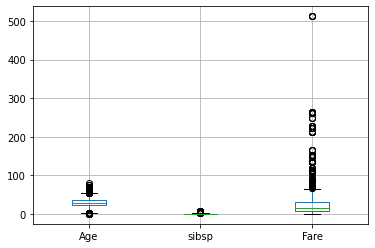

In [17]:
boxplot = df_titanic.boxplot(column=['Age','sibsp', 'Fare']) #constroi o boxplot para as colunas desejadas

In [18]:
df_titanic['Age'].describe() #Verificando estatisticas da idade

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [19]:
df_titanic['Fare'].describe() #Verificando estatistica ref. ao valor da passagem de cada passageiro.

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [20]:
df_titanic['sibsp'].describe() #Sibsp: Verificando estatisticas ref. a Quantidade de irmãos / cônjuges a bordo do Titanic.

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

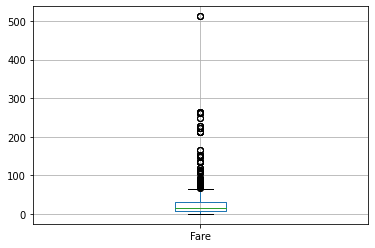

In [21]:
boxplot = df_titanic.boxplot(column=['Fare']) #Identificando um Outlier

Text(0.5, 1.0, 'Distribuição do Sexo dos Passageiros')

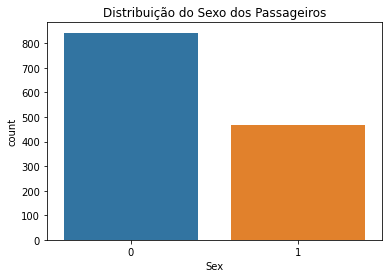

In [22]:
#analisando a distribuição dos clientes por genero
sns.countplot(x='Sex', data=df_titanic); #cria o grafico que conta a quantidade de consumidores existente em cada um dos generos
plt.title('Distribuição do Sexo dos Passageiros') # adiciona o titulo no gráfico

In [23]:
df_titanic.columns #Seleção de colunas

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [24]:
df_titanic.sort_values(by="Passengerid") #Ordena os dados, sem modificar o dataset original.

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [0]:
df_titanic[(df_titanic["Fare"] > 50.0000) & (df_titanic["Age"] > 40.0 )] #Seleção de dados do Dataframe com condição e duas ou mais colunas

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
6,7,54.0,51.8625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
35,36,42.0,52.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
52,53,49.0,76.7292,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
54,55,65.0,61.9792,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
62,63,45.0,83.4750,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1260,45.0,59.4000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1265,1266,54.0,81.8583,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
1266,1267,45.0,262.3750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1288,1289,48.0,79.2000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0


In [25]:
df_titanic.tail() #Tail traz as 5 ultimas linhas do dataframe

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1308,1309,28.0,22.3583,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0.0,0,0,0


In [26]:
df_titanic["Sex"].unique() #Verificar valores unicos da coluna.

array([0, 1])

In [27]:
df_titanic["Sex"].value_counts() #Contando valores da coluna

0    843
1    466
Name: Sex, dtype: int64

In [0]:
df_titanic.groupby("Sex").min() #Agrupador e contador de colunas

,Passengerid,Age,Fare,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Sex,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.33,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1,2,0.17,6.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0


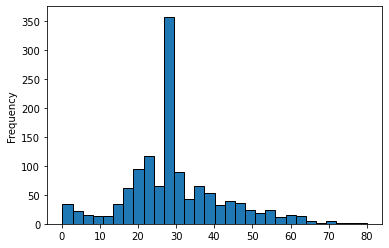

In [28]:
df_titanic["Age"].plot.hist(bins=30, edgecolor='black') #Histograma simples com bordas pretas

No gráfico abaixo é possível visualizar melhor a distribuição de idade dos passageiros


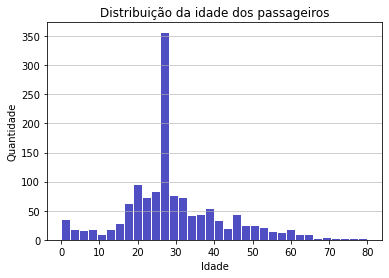

In [29]:
filtered_age = df_titanic[df_titanic['Age'].notnull()]
n, bins, patches = plt.hist(x=filtered_age['Age'], bins='auto', color='#0504aa', alpha=0.7,rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição da idade dos passageiros')
maxfreq = n.max()
print('No gráfico abaixo é possível visualizar melhor a distribuição de idade dos passageiros')

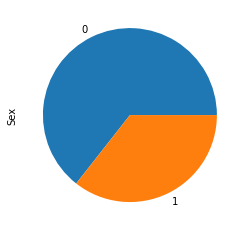

In [30]:
df_titanic["Sex"].value_counts().plot.pie() #Grafico simples de setor.

In [31]:
df_titanic['2urvived']

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, Length: 1309, dtype: int64

## ***Iniciando a Limpeza do Dataset***

In [32]:
#Tratando os dados nulos
df_titanic.fillna(df_titanic.mean(), inplace=True) #substitui os dados que estão como NAN pela média dos valores na coluna
df_titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [0]:
df_new_titanic = df_titanic.rename(columns={"2urvived":"Survived"}) #Renomeando nome da coluna 2urvived para Survived

In [34]:
df_new_titanic['Age'].min() #Valor minimo na coluna idade

0.17

In [35]:
#Dropar colunas sem rotulo caso prefira fazer o delete.
#del df_new_titanic['zero.18']

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [0]:
#Criando um dataset com as colunas necessárias para rodar o modelo
df_titanic_selec = df_new_titanic[['Passengerid','Age','Fare','Sex','sibsp','Embarked','Survived']]

**Regressão Com Árvore de Decisão**

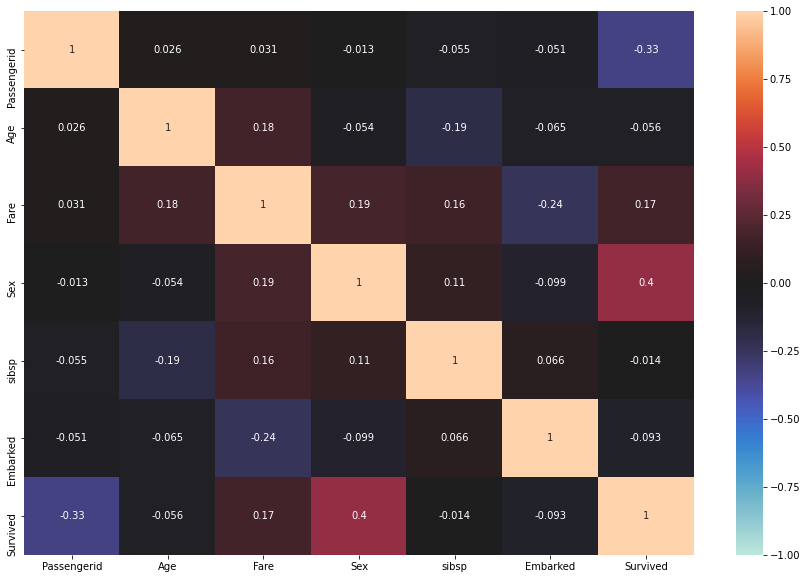

In [38]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(15, 10))
correlacao = df_titanic_selec.corr()  #construindo a matriz de correlação
sn.heatmap(correlacao, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor

In [0]:
entrada_arvore=df_titanic_selec[['Passengerid','Age','Fare','sibsp','Embarked']] #entrada para a regressão via árvore
saida_arvore=df_titanic_selec[['Survived']] #saída para a regressão via árvore

In [81]:
saida_arvore

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1304,0
1305,0
1306,0
1307,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=1000) #divisão entre treinamento e teste

In [83]:
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x_train, y_train) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [96]:
#realiza a previsão
previsao_arvore=arvore_regressora.predict(x_test)
print(previsao_arvore)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.

In [97]:
from sklearn import metrics
from sklearn.metrics import r2_score

#Verificando o Erro Absoluto
print('Erro absoluto:', metrics.mean_absolute_error(y_test, previsao_arvore))
#Verificando o Erro médio quadrado
print('Mean Squared Error:', metrics.mean_squared_error(y_test, previsao_arvore))
#Verificando o R2 ou Coeficiente de Determinação
print('R2_score: %.2f' % r2_score(y_test, previsao_arvore))

Erro absoluto: 0.26208651399491095
Mean Squared Error: 0.26208651399491095
R2_score: -0.41


(array([291.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 102.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

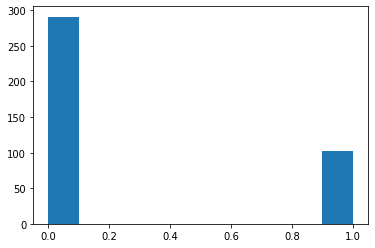

In [102]:
plt.hist(previsao_arvore)

# *Regressão linear multipla*

In [0]:
#Regressão linear multipla
#Preparando os Dados
x = df_titanic_selec[['Passengerid','Age','Fare','sibsp','Embarked']] #entrada para a regressão via árvore
y = df_titanic_selec[['Survived']] #saída para a regressão via árvore

In [106]:
#utiliza as funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg= LinearRegression() #objeto para a regressão linear
regressao= reg.fit (x,y) # realiza a regressão

previsao=reg.predict(x)

MSE= mean_squared_error(y,previsao) # encontra o MSE através do sklearn
print('MSE: ', MSE)


MSE:  0.16187856512288107


In [107]:
#parâmetros encontrados
from sklearn.metrics import r2_score #método para o cálculo do R2

print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Y = [[-0.00039859 -0.00347962  0.00170103 -0.03400528 -0.03461198]]X [0.63702478]
Coeficiente de Determinação (R2): 0.16128181557079713
